<a href="https://colab.research.google.com/github/mrudulamadhavan/MrudulaAP_Scifor/blob/main/MainProject/Fitness_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('fitness_dataset.csv')
df.head()

,TotalSteps,Calories,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,TotalActiveMinutes,TotalDistance,ActivityDayName,TotalMinutesAsleep,TotalTimeInBed,WeightKg,Heightm,BMI
0,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,366,8.49,Tuesday,327,346,119.65328,1.832444,35.63389
1,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,366,8.49,Tuesday,750,775,119.65328,1.832444,35.63389
2,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,366,8.49,Tuesday,503,546,119.65328,1.832444,35.63389
3,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,366,8.49,Tuesday,274,469,119.65328,1.832444,35.63389
4,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,366,8.49,Tuesday,501,541,119.65328,1.832444,35.63389


In [ ]:
df = df.assign(
    TotalActiveMinutes = df.LightlyActiveMinutes + df.FairlyActiveMinutes + df.VeryActiveMinutes,
    TotalDistance = df.LightActiveDistance + df.ModeratelyActiveDistance + df.VeryActiveDistance)


In [ ]:
df.head()

,TotalSteps,Calories,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,TotalActiveMinutes,TotalDistance,ActivityDayName,TotalMinutesAsleep,TotalTimeInBed,WeightKg,Heightm,BMI
0,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,366,8.49,Tuesday,327,346,119.65328,1.832444,35.63389
1,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,366,8.49,Tuesday,750,775,119.65328,1.832444,35.63389
2,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,366,8.49,Tuesday,503,546,119.65328,1.832444,35.63389
3,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,366,8.49,Tuesday,274,469,119.65328,1.832444,35.63389
4,13162,1985,728,328,13,25,0.0,6.06,0.55,1.88,366,8.49,Tuesday,501,541,119.65328,1.832444,35.63389


In [ ]:
df.drop(['BMI'],axis=1,inplace = True)

In [ ]:
# Assuming merged_df is your DataFrame
duplicates_sum = df.duplicated().sum()
print("Number of duplicate rows:", duplicates_sum)

Number of duplicate rows: 122


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12503 entries, 0 to 12624
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalSteps                12503 non-null  int64  
 1   Calories                  12503 non-null  int64  
 2   SedentaryMinutes          12503 non-null  int64  
 3   LightlyActiveMinutes      12503 non-null  int64  
 4   FairlyActiveMinutes       12503 non-null  int64  
 5   VeryActiveMinutes         12503 non-null  int64  
 6   SedentaryActiveDistance   12503 non-null  float64
 7   LightActiveDistance       12503 non-null  float64
 8   ModeratelyActiveDistance  12503 non-null  float64
 9   VeryActiveDistance        12503 non-null  float64
 10  TotalActiveMinutes        12503 non-null  int64  
 11  TotalDistance             12503 non-null  float64
 12  ActivityDayName           12503 non-null  object 
 13  TotalMinutesAsleep        12503 non-null  int64  
 14  TotalTimeIn

In [ ]:
df.drop(['TotalTimeInBed'],inplace = True,axis =1)

In [ ]:
df = df.rename(columns={'Calories': 'CaloriesBurnt','TotalDistance':'TotalDistancekm'})

In [ ]:
df.columns

Index(['TotalSteps', 'CaloriesBurnt', 'SedentaryMinutes',
       'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes',
       'SedentaryActiveDistance', 'LightActiveDistance',
       'ModeratelyActiveDistance', 'VeryActiveDistance', 'TotalActiveMinutes',
       'TotalDistancekm', 'ActivityDayName', 'TotalMinutesAsleep', 'WeightKg',
       'Heightm'],
      dtype='object')

In [ ]:
df.drop(['LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance', 'LightActiveDistance',
         'ModeratelyActiveDistance', 'VeryActiveDistance'],inplace = True,axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12503 entries, 0 to 12624
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TotalSteps          12503 non-null  int64  
 1   CaloriesBurnt       12503 non-null  int64  
 2   SedentaryMinutes    12503 non-null  int64  
 3   TotalActiveMinutes  12503 non-null  int64  
 4   TotalDistancekm     12503 non-null  float64
 5   ActivityDayName     12503 non-null  object 
 6   TotalMinutesAsleep  12503 non-null  int64  
 7   WeightKg            12503 non-null  float64
 8   Heightm             12503 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 976.8+ KB


In [ ]:
# Generate random values for age group
age_groups = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = np.random.choice(age_groups, size=len(df))

# Generate random values for gender
genders = ['Male', 'Female']
df['Gender'] = np.random.choice(genders, size=len(df))

In [ ]:
df.columns

Index(['TotalSteps', 'CaloriesBurnt', 'SedentaryMinutes', 'TotalActiveMinutes',
       'TotalDistancekm', 'ActivityDayName', 'TotalMinutesAsleep', 'WeightKg',
       'Heightm', 'AgeGroup', 'Gender'],
      dtype='object')

In [ ]:
df = df[['AgeGroup','Gender', 'WeightKg', 'Heightm', 'ActivityDayName',  'TotalMinutesAsleep',
       'SedentaryMinutes', 'TotalActiveMinutes','TotalDistancekm','CaloriesBurnt','TotalSteps' ]]

In [ ]:
for col in ['AgeGroup', 'Gender', 'ActivityDayName']:
  df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12503 entries, 0 to 12624
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   AgeGroup            12503 non-null  category
 1   Gender              12503 non-null  category
 2   WeightKg            12503 non-null  float64 
 3   Heightm             12503 non-null  float64 
 4   ActivityDayName     12503 non-null  category
 5   TotalMinutesAsleep  12503 non-null  int64   
 6   SedentaryMinutes    12503 non-null  int64   
 7   TotalActiveMinutes  12503 non-null  int64   
 8   TotalDistancekm     12503 non-null  float64 
 9   CaloriesBurnt       12503 non-null  int64   
 10  TotalSteps          12503 non-null  int64   
dtypes: category(3), float64(3), int64(5)
memory usage: 916.4 KB


In [ ]:
df.head()

,AgeGroup,Gender,WeightKg,Heightm,ActivityDayName,TotalMinutesAsleep,SedentaryMinutes,TotalActiveMinutes,TotalDistancekm,CaloriesBurnt,TotalSteps
0,45-54,Female,119.65328,1.832444,Tuesday,327,728,366,8.49,1985,13162
1,18-24,Male,119.65328,1.832444,Tuesday,750,728,366,8.49,1985,13162
2,25-34,Female,119.65328,1.832444,Tuesday,503,728,366,8.49,1985,13162
3,35-44,Female,119.65328,1.832444,Tuesday,274,728,366,8.49,1985,13162
4,18-24,Female,119.65328,1.832444,Tuesday,501,728,366,8.49,1985,13162


In [ ]:
df.to_csv('fitnesstracker_dataset.csv', index=False)

In [ ]:
df.AgeGroup.unique()

['45-54', '18-24', '25-34', '35-44', '55-64', '65+']
Categories (6, object): ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

### **Data Description**

The dataset contains fitness-related metrics recorded for individuals, with 12503 entries across 11 columns.

Below is a brief description of each column:

* **AgeGroup:** Categorical variable representing the age group of the individual.

* **Gender:** Categorical variable indicating the gender of the individual.

* **WeightKg:** Continuous variable representing the weight of the individual in kilograms.

* **Heightm:** Continuous variable representing the height of the individual in meters.

* **ActivityDayName:** Categorical variable indicating the day of the week on which the activity data was recorded.

* **TotalMinutesAsleep:** Continuous variable representing the total number of minutes the individual spent asleep.

* **SedentaryMinutes:** Continuous variable representing the total number of minutes the individual spent in a sedentary (inactive) state.

* **TotalActiveMinutes:** Continuous variable representing the total number of minutes the individual spent in active physical activity.

* **TotalDistancekm:** Continuous variable representing the total distance traveled by the individual in kilometers.

* **CaloriesBurnt:** Continuous variable representing the total number of calories burned by the individual through physical activity.

* **TotalSteps:** Continuous variable representing the total number of steps taken by the individual.

In [ ]:
# Extract numerical features
numeric_features = df.select_dtypes(include=['number'])

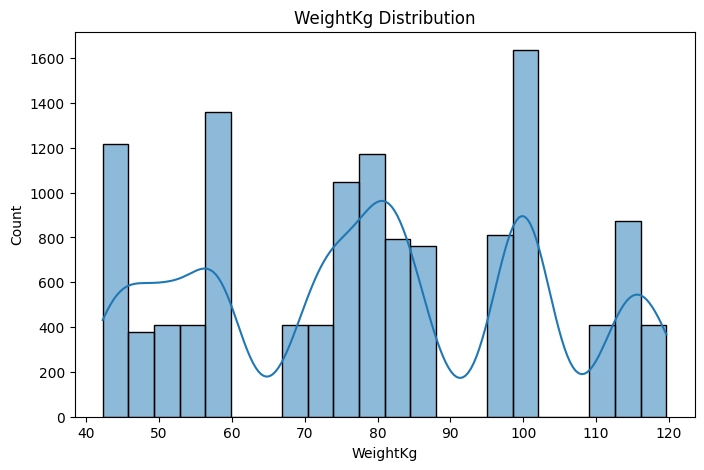

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


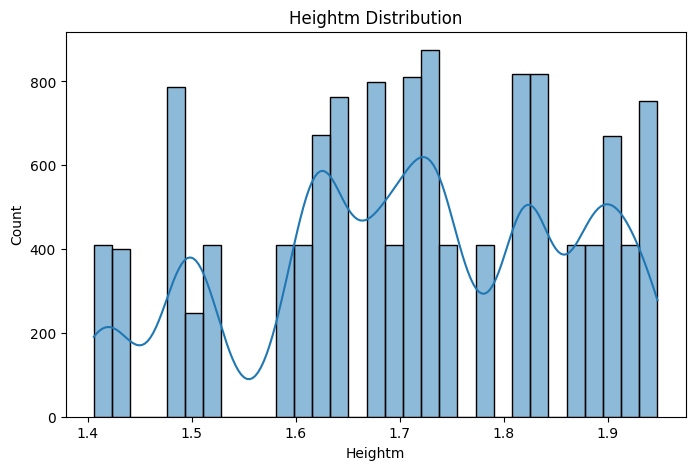

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


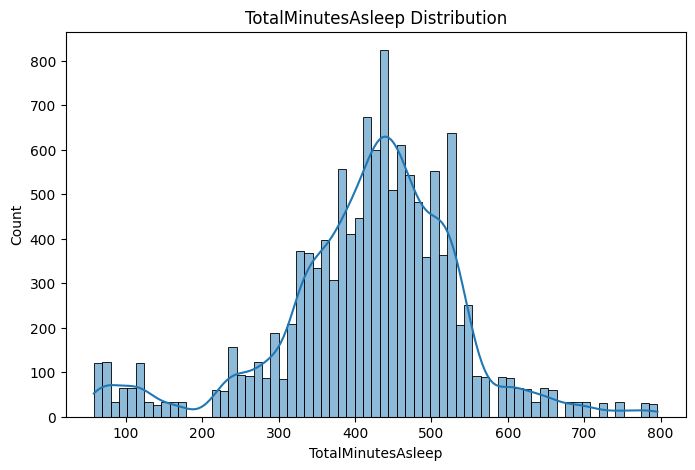

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


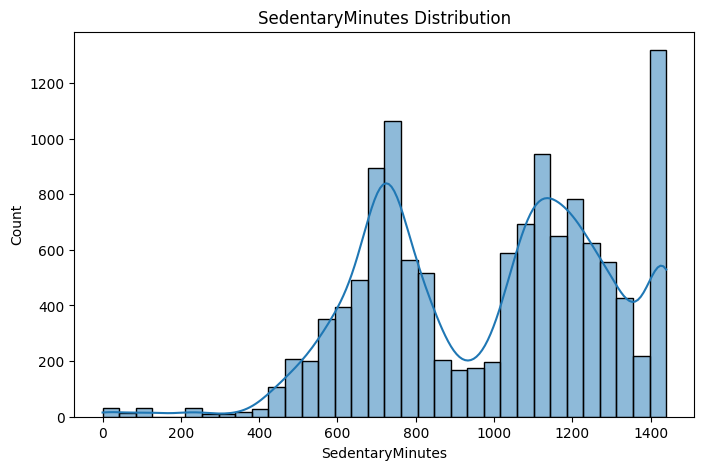

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


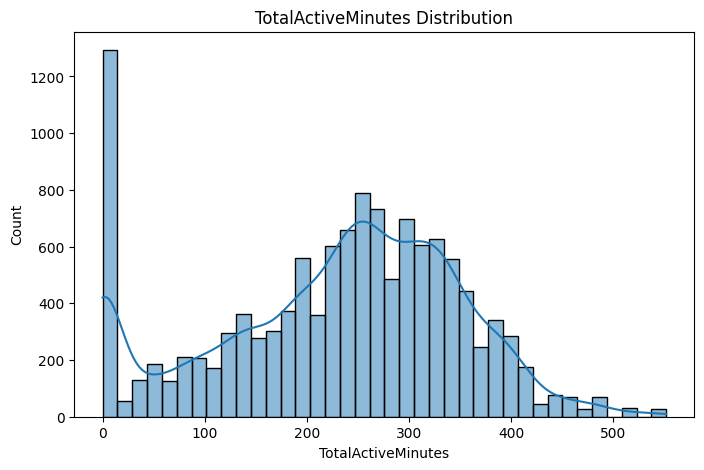

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


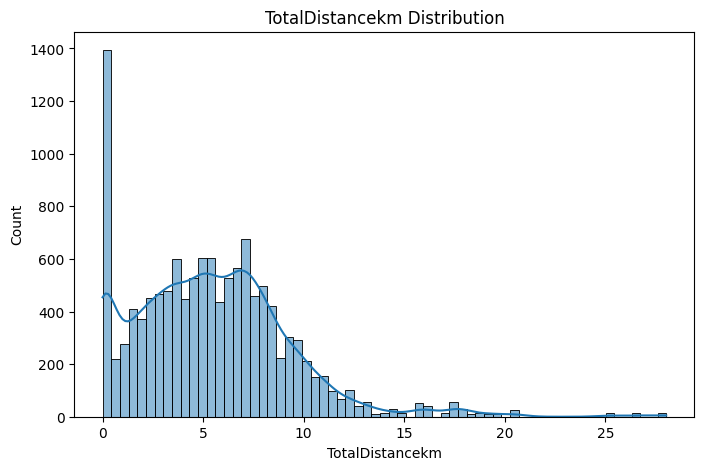

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


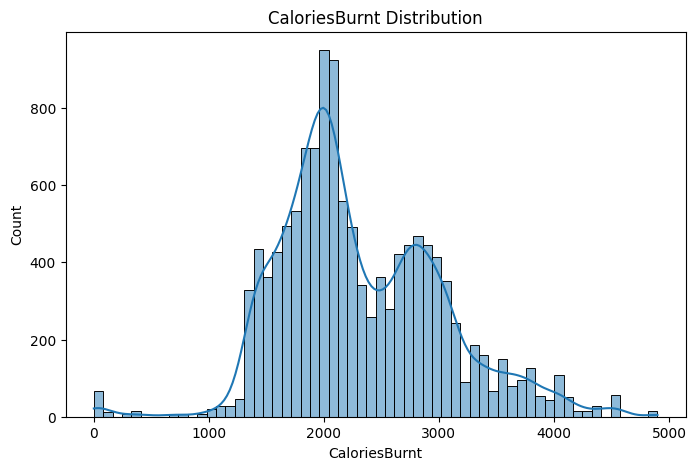

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


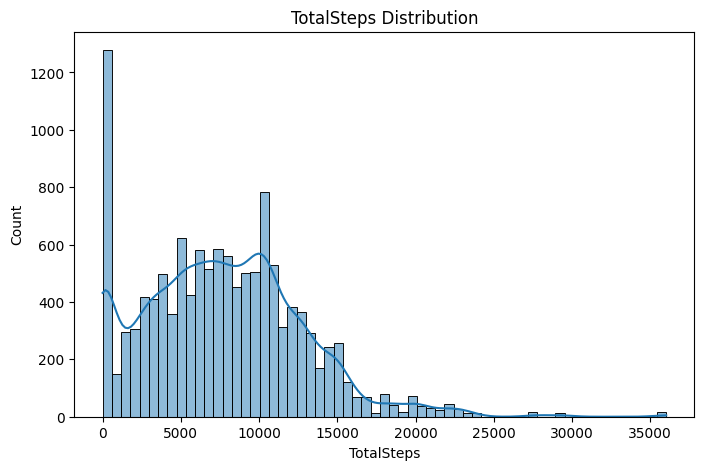

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Assuming 'numeric_features' contains the names of all numeric features in the dataset
for col in numeric_features:
    plt.figure(figsize=(8, 5))


    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"{col} Distribution")



    plt.show()
    print("----" * 50)

In [ ]:
# Define the features to transform
#features_to_transform = ['TotalSteps', 'TotalDistance','TotalActiveMinutes','TotalTimeInBed','TotalMinutesAsleep','SedentaryMinutes']

# Apply square root transformation to each feature
#for feature in features_to_transform:
    #df[feature] = np.sqrt(df[feature])

In [ ]:
# Function to detect and remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_removed = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return outliers_removed

# Define the columns for outlier detection and removal
columns_to_check = ['TotalSteps', 'TotalDistancekm','TotalActiveMinutes','TotalMinutesAsleep','SedentaryMinutes','CaloriesBurnt']

# Iterate over each column and remove outliers
for column in columns_to_check:
    df = remove_outliers_iqr(df, column)


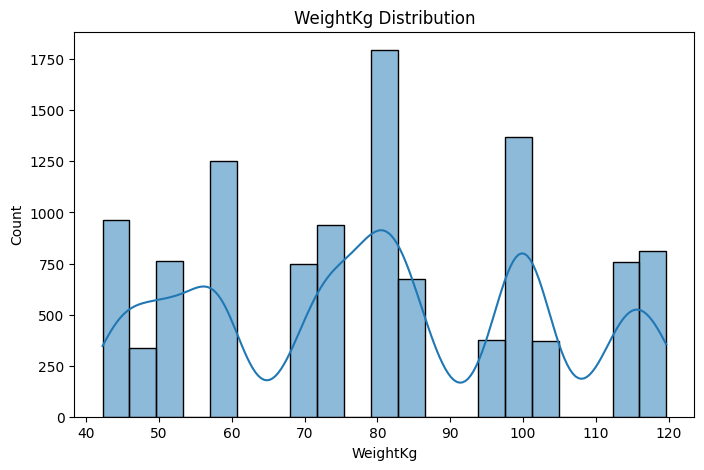

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


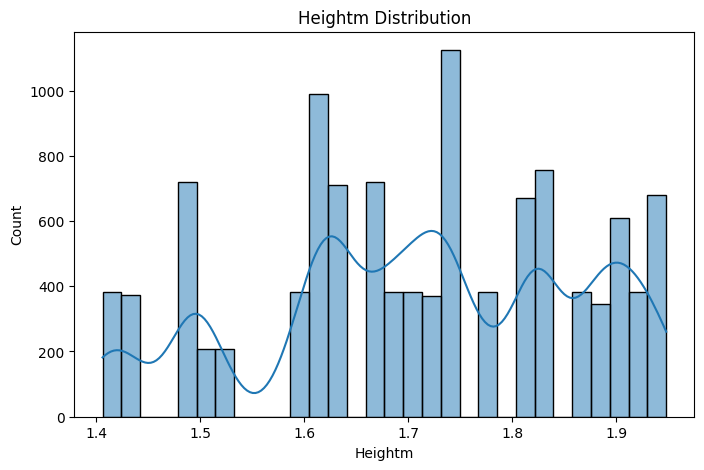

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


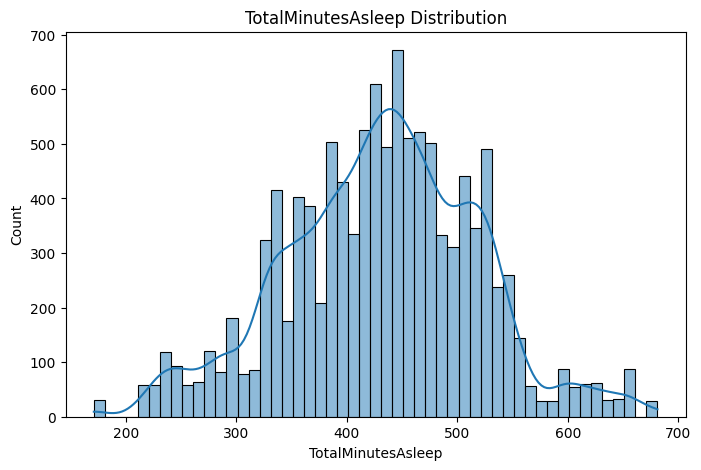

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


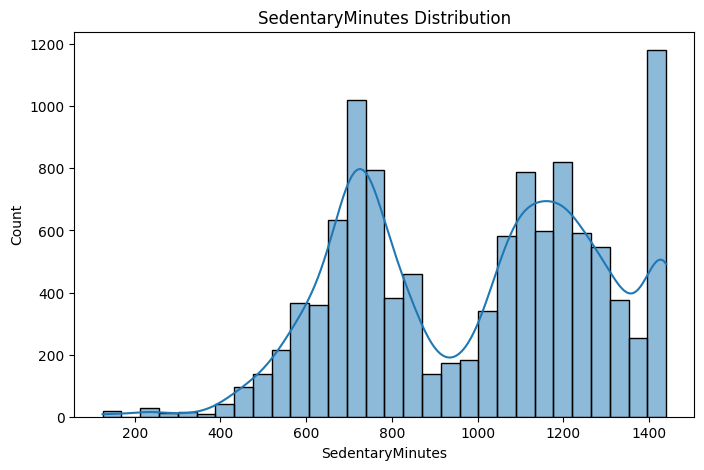

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


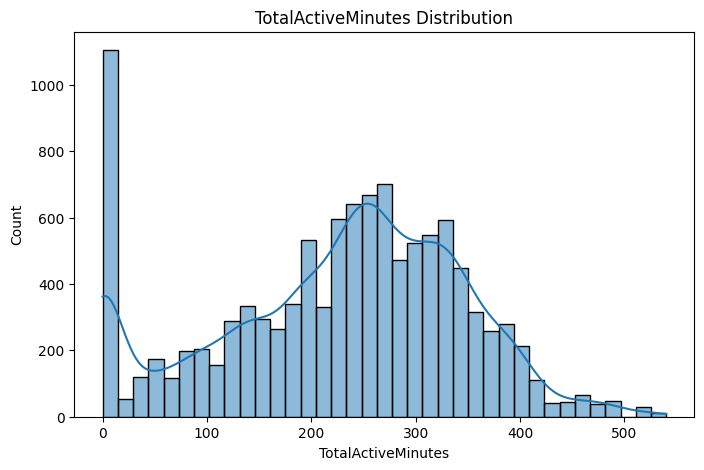

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


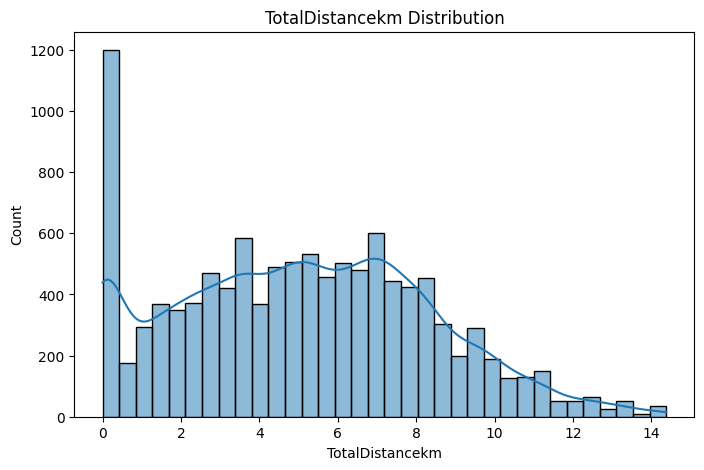

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


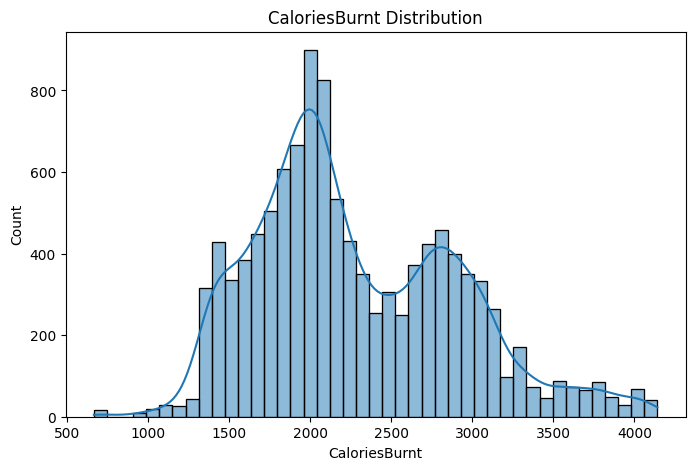

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


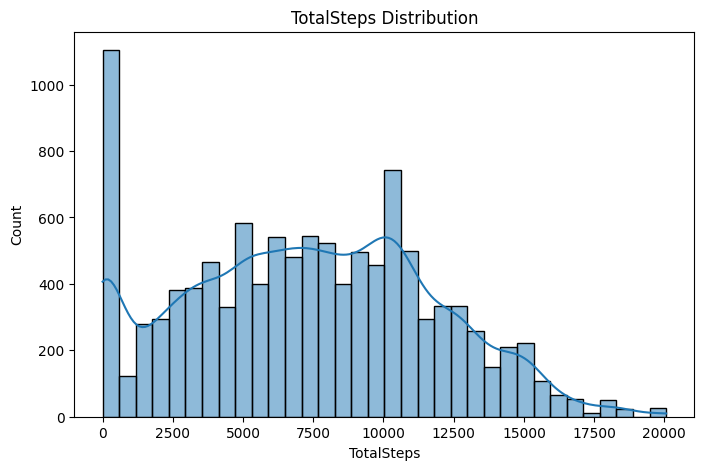

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Assuming 'numeric_features' contains the names of all numeric features in the dataset
for col in numeric_features:
    plt.figure(figsize=(8, 5))

    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"{col} Distribution")

    plt.show()
    print("----" * 50)

In [ ]:
for col in ['TotalSteps', 'TotalDistancekm','TotalActiveMinutes','TotalMinutesAsleep','SedentaryMinutes','CaloriesBurnt']:
  df[col] = df[col].astype('int64')

In [ ]:
df.groupby('ActivityDayName').agg(
    AvgSedentaryMinutes = ('SedentaryMinutes','mean'),
    AvgActiveMinutes = ('TotalActiveMinutes','mean'),
    AvgTotalSteps =  ('TotalSteps', 'mean'),
    AvgTotalDistance = ('TotalDistancekm', 'mean'),
    AvgCalorieBurnt = ('CaloriesBurnt', 'mean')
)

,AvgSedentaryMinutes,AvgActiveMinutes,AvgTotalSteps,AvgTotalDistance,AvgCalorieBurnt
ActivityDayName,,,,,
Friday,1000.475985,236.836207,7187.876847,4.573276,2316.597906
Monday,1028.275616,226.583797,7490.050040,4.778396,2288.626688
Saturday,979.170836,238.122230,7381.167262,4.719085,2287.593281
Sunday,996.063264,197.719626,6116.925234,3.882818,2165.235083
Thursday,983.295322,221.570175,7224.336842,4.590058,2208.039766
Tuesday,1009.824064,236.223529,8045.236364,5.119786,2365.643850
Wednesday,993.833857,223.236373,7268.743187,4.707547,2283.085954


<Axes: >

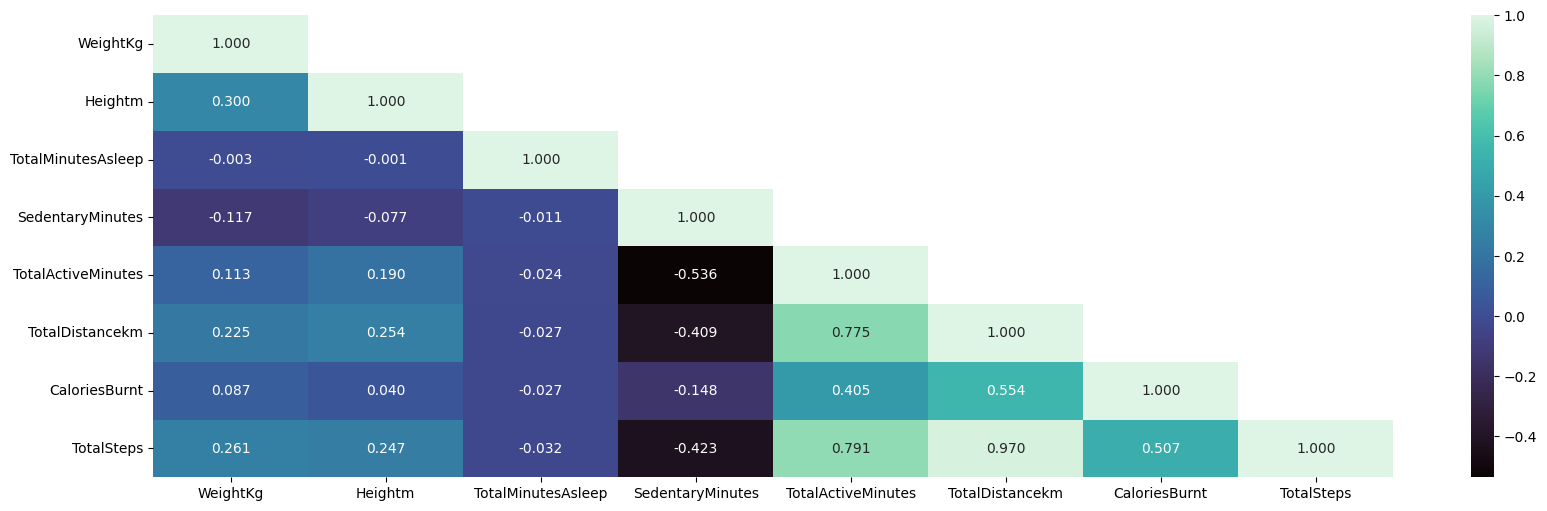

In [ ]:
corr =  df.select_dtypes(include=['number']).corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
f, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(corr, annot = True, fmt='.3f',mask=mask, cmap='mako',cbar=True )

In [ ]:
# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif.sort_values(by='VIF', ascending=False)

calc_vif(df.select_dtypes(include=['float','int']).drop('TotalSteps', axis=1))

,feature,VIF
1,Heightm,61.809818
2,TotalMinutesAsleep,22.145254
6,CaloriesBurnt,19.132617
3,SedentaryMinutes,16.285442
0,WeightKg,15.310556
4,TotalActiveMinutes,12.964931
5,TotalDistancekm,9.399627


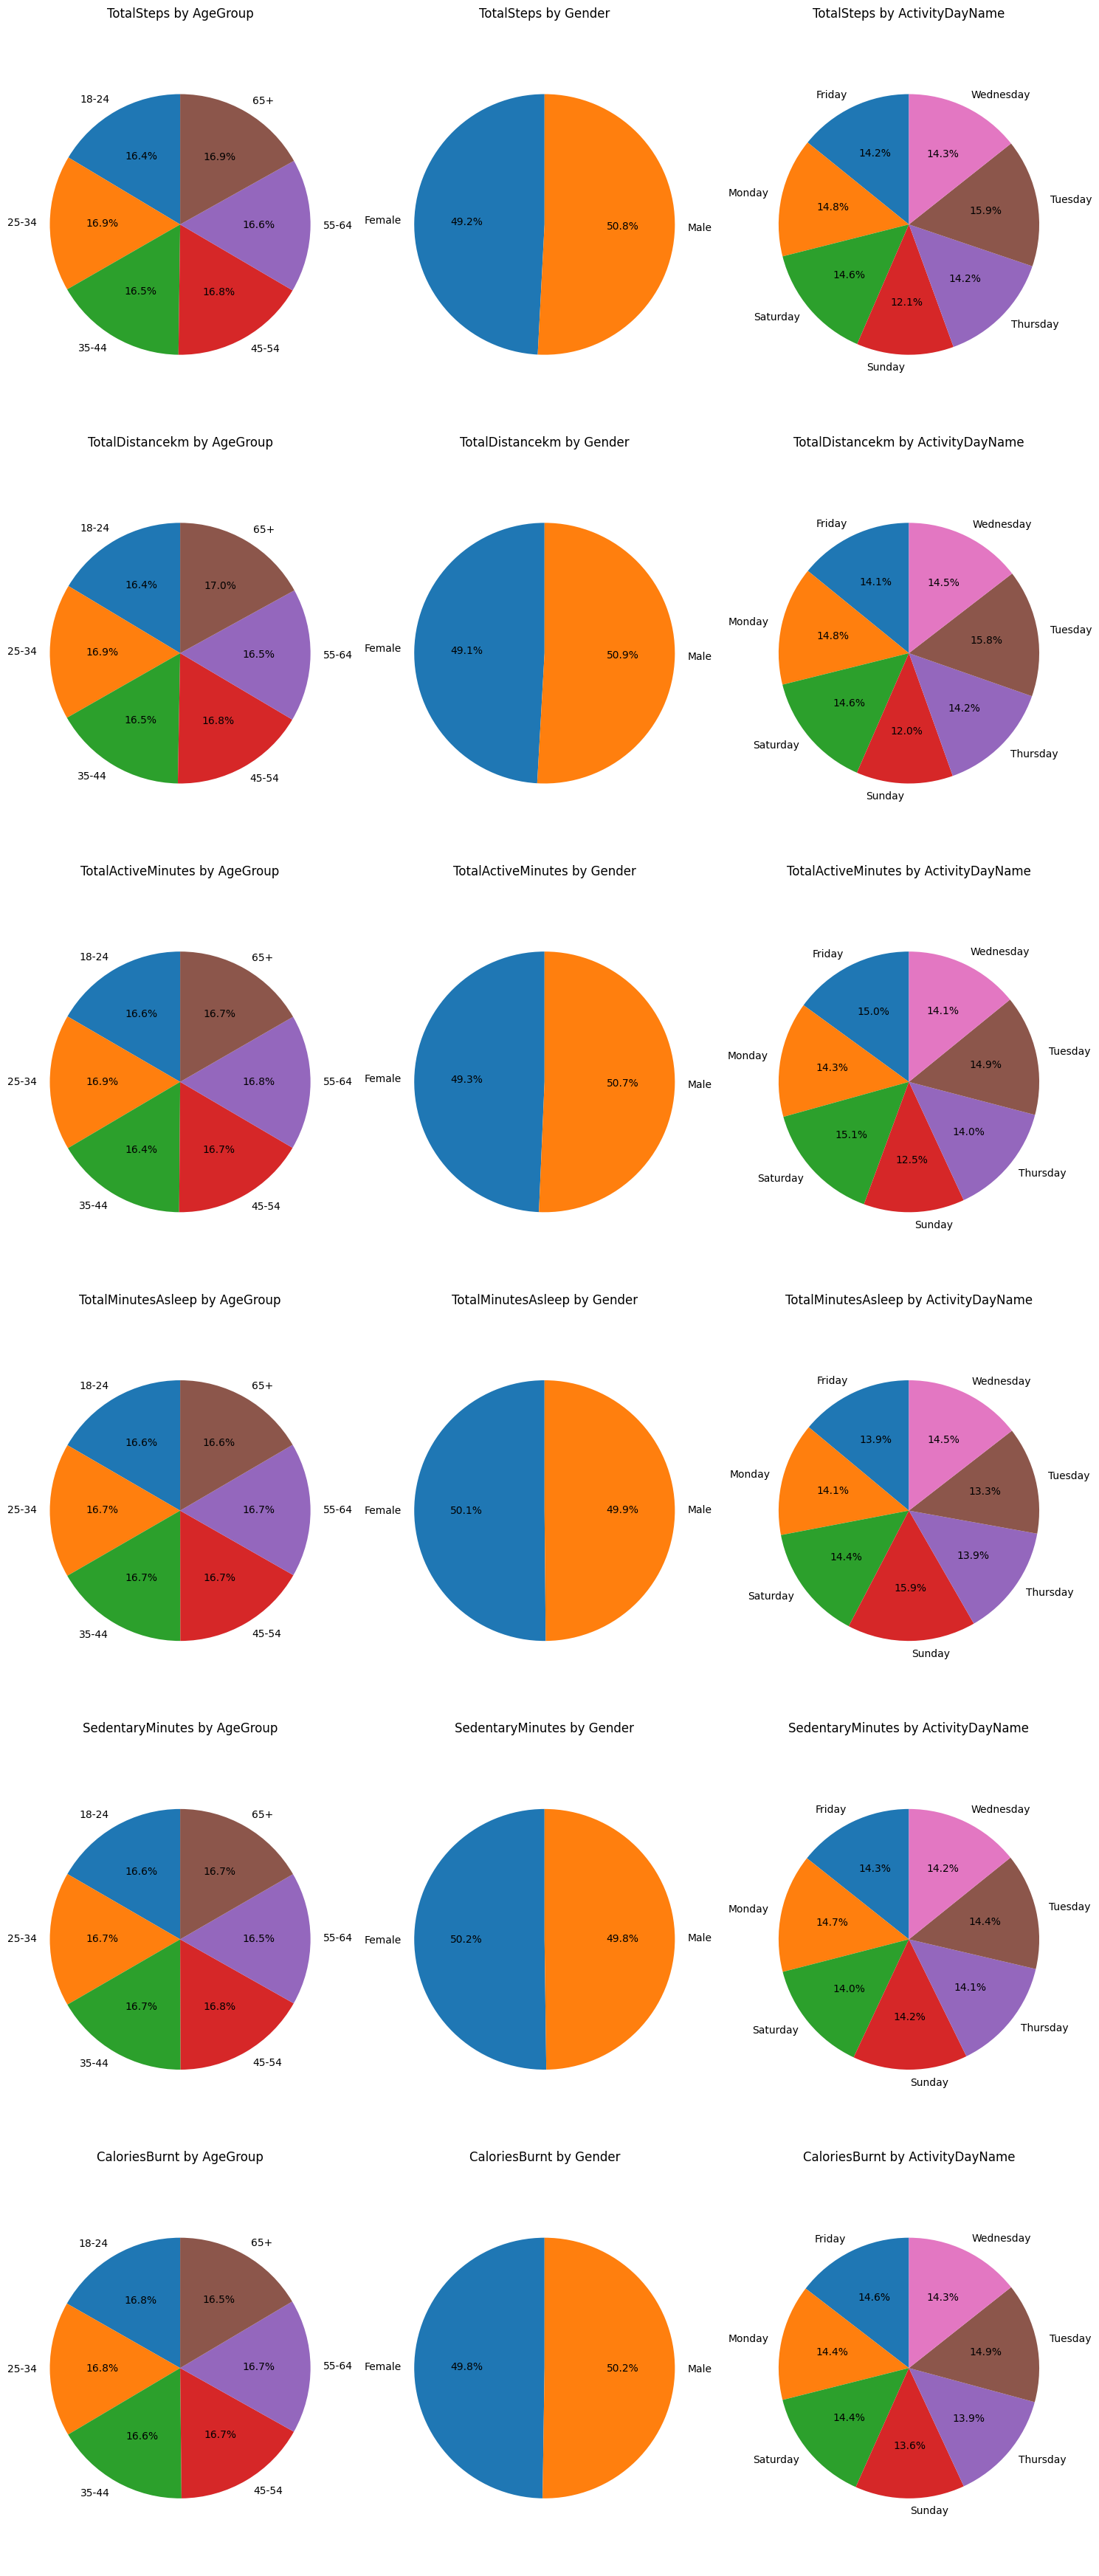

In [ ]:
# Define the selected features
selected_features = ['TotalSteps', 'TotalDistancekm','TotalActiveMinutes','TotalMinutesAsleep','SedentaryMinutes','CaloriesBurnt']

# Define the categorical variables to group by
categorical_variables = ['AgeGroup', 'Gender', 'ActivityDayName']

# Create subplots
fig, axes = plt.subplots(nrows=len(selected_features), ncols=len(categorical_variables), figsize=(15, 35))

# Iterate over numerical features
for i, feature in enumerate(selected_features):
    # Iterate over categorical variables

    for j, var in enumerate(categorical_variables):
        # Group data by categorical variable and calculate mean for the selected feature
        grouped_data = df.groupby(var)[feature].mean()

        # Plot pie chart
        axes[i, j].pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90)
        axes[i, j].set_title(f'{feature} by {var}')
        axes[i, j].axis('equal')

# Adjust layout
plt.tight_layout()

plt.show()

In [ ]:
# Function to distribute hour
def age_group(agegroup):

    if agegroup == '18-24':
        return 0.0
    elif agegroup == '25-34':
        return 1.0
    elif agegroup == '35-44':
        return 2.0
    elif agegroup == '45-54':
        return 3.0
    elif agegroup == '55-64':
        return 4.0
    elif agegroup == '65+':
        return 5.0
    else:
        pass

df['AgeGroup'] = df['AgeGroup'].apply(age_group).astype('float64')


In [ ]:
def replace_weekday(activityday):

    if activityday =='Sunday':
        return 1.0
    elif activityday =='Monday':
        return 2.0
    elif activityday =='Tuesday':
        return 3.0
    elif activityday =='Wednesday':
        return 4.0
    elif activityday =='Thursday':
        return 5.0
    elif activityday =='Friday':
        return 6.0
    elif activityday == 'Saturday':
        return 7.0
    else:
        pass

df['ActivityDayName'] = df['ActivityDayName'].apply(replace_weekday)

In [ ]:
def gender_map(gender):
    if gender == 'Male':
        return 0.0
    elif gender == 'Female':
        return 1.0
    else:
        pass

df['Gender'] = df['Gender'].apply(gender_map)

In [ ]:
# Round off values in 'TotalActiveMinutes' and 'TotalSteps' columns
df['TotalActiveMinutes'] = df['TotalActiveMinutes'].round()
df['TotalSteps'] = df['TotalSteps'].round()

In [ ]:
# Round off values in 'TotalActiveMinutes' and 'TotalSteps' columns
df['WeightKg'] = df['WeightKg'].round(3)
df['Heightm'] = df['Heightm'].round(3)

df['TotalDistancekm'] = df['TotalDistancekm'].round(3)
df['SedentaryMinutes'] = df['SedentaryMinutes'].round()


In [ ]:
for col in ['Gender', 'ActivityDayName']:
  df[col] = df[col].astype('int64')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Define the columns to be normalized
columns_to_normalize = ['TotalDistancekm','TotalActiveMinutes','TotalMinutesAsleep','SedentaryMinutes']

# Apply Min-Max Scaling to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [ ]:
df.drop(['CaloriesBurnt'],inplace = True,axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Split data into features and target variables
X = df.drop(['TotalSteps'], axis=1)
y1 = df[['TotalSteps']]


#Standarizing the features
std=StandardScaler()
std_fit=std.fit(X)
X=std_fit.transform(X)

# Split data into train and test sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# describes info about train and test set
print('Target : Total Steps')
print("For Train data :  ", X_train.shape,y1_train.shape)
print("For Test data :  ",X_test.shape,y1_test.shape)


Target : Total Steps
For Train data :   (8928, 9) (8928, 1)
For Test data :   (2233, 9) (2233, 1)


In [ ]:
# Dictionary to store different models accuracies
model_results = {}


In [ ]:
# Linear regression with hyperparameter tuning
model_lr_cv = LinearRegression()
params = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(model_lr_cv, params, cv=5, scoring='neg_mean_squared_error')

# Fit the Algorithm
grid_search.fit(X_train, y1_train)

# Best Linear Regression Model
linear_reg_cv = grid_search.best_estimator_

# Predictions on the model
train_preds = linear_reg_cv.predict(X_train)
test_preds = linear_reg_cv.predict(X_test)

# Calculate mean squared error, mean absolute error, and R^2 score for both target variables
mse_lr_tr = mean_squared_error(y1_train, train_preds, multioutput='raw_values').round(3)
mae_lr_tr = mean_absolute_error(y1_train, train_preds, multioutput='raw_values').round(3)
r2_lr_tr = r2_score(y1_train, train_preds, multioutput='raw_values').round(3)

mse_lr_ts = mean_squared_error(y1_test, test_preds, multioutput='raw_values').round(3)
mae_lr_ts = mean_absolute_error(y1_test, test_preds, multioutput='raw_values').round(3)
r2_lr_ts = r2_score(y1_test, test_preds, multioutput='raw_values').round(3)

# Print evaluation results for TotalSteps
print("Linear Regression Model Evaluation for TotalSteps:")
print("Training Data:")
print("  > MSE:", mse_lr_tr[0])
print("  > MAE:", mae_lr_tr[0])
print("  > R2 Score:", r2_lr_tr[0])
print("\nTesting Data:")
print("  > MSE:", mse_lr_ts[0])
print("  > MAE:", mae_lr_ts[0])
print("  > R2 Score:", r2_lr_ts[0])
mse_lr_ts = mse_lr_ts[0]
mae_lr_ts = mae_lr_ts[0]
r2_lr_ts = r2_lr_ts[0]



Linear Regression Model Evaluation for TotalSteps:
Training Data:
  > MSE: 1062797.269
  > MAE: 641.387
  > R2 Score: 0.947

Testing Data:
  > MSE: 880624.172
  > MAE: 617.275
  > R2 Score: 0.955


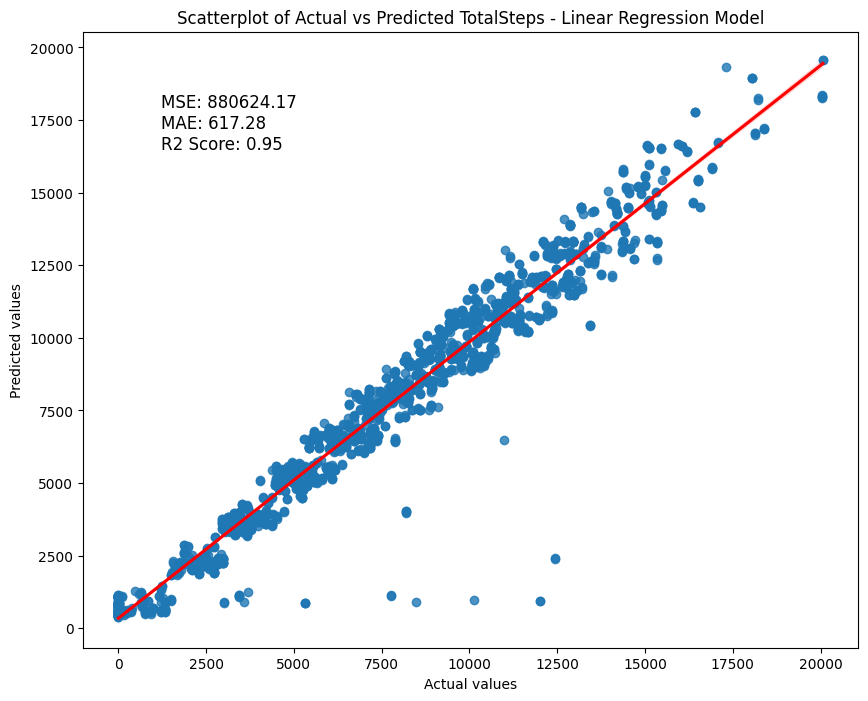

In [ ]:
# Calculate the prediction residuals
residuals = y1_test['TotalSteps'] - test_preds[:, 0]

# Calculate the evaluation metrics
mse = mean_squared_error(y1_test['TotalSteps'], test_preds[:, 0])
mae = mean_absolute_error(y1_test['TotalSteps'], test_preds[:, 0])
r2 = r2_score(y1_test['TotalSteps'], test_preds[:, 0])

# Plot scatterplot with regression line
plt.figure(figsize=(10, 8))
sns.regplot(x=y1_test['TotalSteps'], y=test_preds[:, 0], line_kws={"color": "red"})
plt.title('Scatterplot of Actual vs Predicted TotalSteps - Linear Regression Model')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Display the evaluation metrics on the plot
plt.text(0.1, 0.9, f'MSE: {mse:.2f}\nMAE: {mae:.2f}\nR2 Score: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()

In [ ]:
# Storing model performance for comparision later
model_results['Linear Regression'] = [r2_lr_ts, mse_lr_ts, mae_lr_ts]

**-------------------------------------------------------------**

In [ ]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=1)

# Fit the model
rf_model.fit(X_train, y1_train)  # Reshape y_train to a 1D array using ravel()

# Predict on the model
train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

# Calculate evaluation metrics for training data
mse_rf_tr = mean_squared_error(y1_train, train_preds).round(3)
mae_rf_tr = mean_absolute_error(y1_train, train_preds).round(3)
r2_rf_tr = r2_score(y1_train, train_preds).round(3)

# Print evaluation metrics for training data
print("Training Data:")
print("  > MSE:", mse_rf_tr)
print("  > MAE:", mae_rf_tr)
print("  > R2 Score:", r2_rf_tr)

# Calculate evaluation metrics for testing data
mse_rf_ts = mean_squared_error(y1_test, test_preds).round(3)
mae_rf_ts = mean_absolute_error(y1_test, test_preds).round(3)
r2_rf_ts = r2_score(y1_test, test_preds).round(3)

# Print evaluation metrics for testing data
print("\nTesting Data:")
print("  > MSE:", mse_rf_ts)
print("  > MAE:", mae_rf_ts)
print("  > R2 Score:", r2_rf_ts)

Training Data:
  > MSE: 30.238
  > MAE: 1.194
  > R2 Score: 1.0

Testing Data:
  > MSE: 165.641
  > MAE: 3.606
  > R2 Score: 1.0


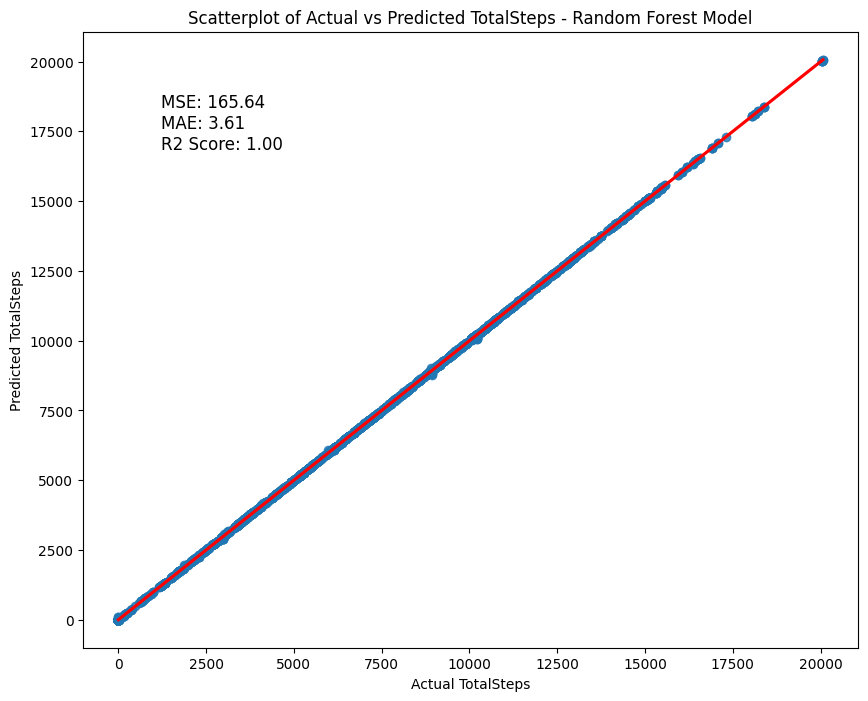

In [ ]:
# Calculate the evaluation metrics
mse_rf_ts = mean_squared_error(y1_test['TotalSteps'], test_preds)
mae_rf_ts = mean_absolute_error(y1_test['TotalSteps'], test_preds)
r2_rf_ts = r2_score(y1_test['TotalSteps'], test_preds)


# Plot scatterplot with regression line
plt.figure(figsize=(10, 8))
sns.regplot(x=y1_test['TotalSteps'], y=test_preds, line_kws={"color": "red"})
plt.title('Scatterplot of Actual vs Predicted TotalSteps - Random Forest Model')
plt.xlabel('Actual TotalSteps')
plt.ylabel('Predicted TotalSteps')

# Display the evaluation metrics on the plot
plt.text(0.1, 0.9, f'MSE: {mse_rf_ts:.2f}\nMAE: {mae_rf_ts:.2f}\nR2 Score: {r2_rf_ts:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()

In [ ]:
model_results['Random Forest '] = [r2_rf_ts, mse_rf_ts, mae_rf_ts]

In [ ]:
params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 6, 10, 12, 15],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 1.0],
    'n_estimators': [50, 100, 200, 300, 500],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}
xgb_model = XGBRegressor(random_state=1)

rand_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=50, cv=5, n_jobs=-1, random_state=1)

# Fit the Algorithm
rand_result = rand_search.fit(X_train, y1_train)
xgb_model_cv = rand_search.best_estimator_

# Predict on the model
train_preds = xgb_model_cv.predict(X_train)
test_preds = xgb_model_cv.predict(X_test)

mse_xb_tr = mean_squared_error(y1_train, train_preds).round(3)
mae_xb_tr = mean_absolute_error(y1_train, train_preds).round(3)
r2_xb_tr =  r2_score(y1_train, train_preds).round(3)
print("Training Data:")
print("  > MSE:", mse_xb_tr)
print("  > MAE:", mae_xb_tr)
print("  > R2 Score:", r2_xb_tr)

mse_xb_ts = mean_squared_error(y1_test, test_preds)
mae_xb_ts = mean_absolute_error(y1_test, test_preds)
r2_xb_ts = r2_score(y1_test, test_preds)
print("\nTesting Data:")
print("  > MSE:", mse_xb_ts.round(3))
print("  > MAE:", mae_xb_ts.round(3))
print("  > R2 Score:", r2_xb_ts.round(3))

Training Data:
  > MSE: 0.0
  > MAE: 0.003
  > R2 Score: 1.0

Testing Data:
  > MSE: 124.339
  > MAE: 1.962
  > R2 Score: 1.0


In [ ]:
model_results['XGBoost '] = [r2_xb_ts, mse_xb_ts, mae_xb_ts]

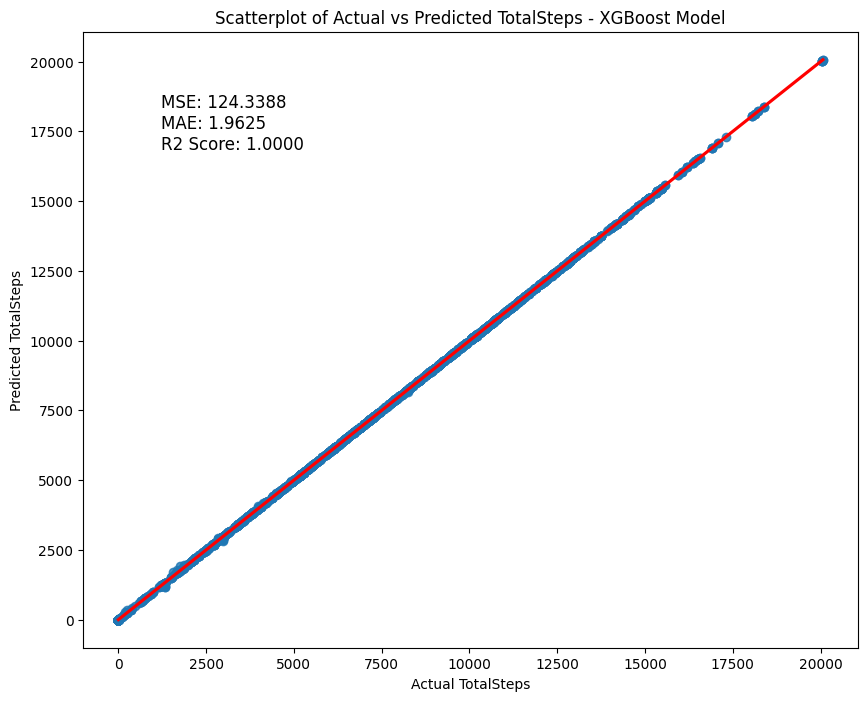

In [ ]:
# Calculate the evaluation metrics
mse_xb_ts = mean_squared_error(y1_test['TotalSteps'], test_preds)
mae_xb_ts = mean_absolute_error(y1_test['TotalSteps'], test_preds)
r2_xb_ts = r2_score(y1_test['TotalSteps'], test_preds)


# Plot scatterplot with regression line
plt.figure(figsize=(10, 8))
sns.regplot(x=y1_test['TotalSteps'], y=test_preds, line_kws={"color": "red"})
plt.title('Scatterplot of Actual vs Predicted TotalSteps - XGBoost Model')
plt.xlabel('Actual TotalSteps')
plt.ylabel('Predicted TotalSteps')

# Display the evaluation metrics on the plot
plt.text(0.1, 0.9, f'MSE: {mse_xb_ts:.4f}\nMAE: {mae_xb_ts:.4f}\nR2 Score: {r2_xb_ts:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.show()

In [ ]:
Model_com_df = pd.DataFrame(model_results).T
Model_com_df.columns = ["R2", 'MSE', 'MAE']
Model_com_df = Model_com_df.sort_values(by='R2',ascending=False)
Model_com_df.style.format('{:.5f}').background_gradient(cmap='mako')

,R2,MSE,MAE
XGBoost,0.99999,124.33883,1.96247
Random Forest,0.99999,165.64144,3.60635
Linear Regression,0.95500,880624.17200,617.27500


The XGBoost model seems to be the best choice for this dataset as it has the highest R2 score, the lowest MSE, and the lowest MAE with test data.

In [ ]:
import pickle
# Save the model to a pickle file
with open("xgb_model.pkl", "wb") as f:
  pickle.dump(xgb_model_cv, f)

In [ ]:
# Load the model from the pickle file
with open("xgb_model.pkl", "rb") as f:
    loaded_xgb_model = pickle.load(f)

new_test_preds = loaded_xgb_model.predict(X_test)

# Sanity Check
mse = mean_squared_error(y1_test, new_test_preds)
mae = mean_absolute_error(y1_test, new_test_preds)
r2 = r2_score(y1_test, new_test_preds)
print("MSE:", mse.round(4))
print("MAE:", mae.round(4))
print("R2 Score:", r2.round(4))

MSE: 124.3388
MAE: 1.9625
R2 Score: 1.0
